In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import isnan
%matplotlib inline

In [43]:
def all_values_equal(table, column, check_nan=True, value = None):
    """
    по умолчанию проверяет во всех ли таблицах данная колонка Nan;
    
    
    если check_nan = False, проверяет, в каждой ли таблице одинаковое значение 
    в данной колонке, но необязательно одно для всех таблиц;
    
    
    если  задан value, проверяет во всех ли таблицах в этой колонке именно такое значение;
    
                   
    возвращает название колонки, результат функции и название курса, где первый раз было невыполнено условие


    """
    if check_nan and value is not None:
        raise Exception('Поставьте check_nan=False или уберите значение value')
        
    subjects = ['math','physics','linguo']
    coursers = [['293','294','295'], ['345','346'],['267','268']]
    for s in enumerate(subjects):
        for c in coursers[s[0]]:
            path = f'courses_with_manual_check/{s[1]}/{c}/'
            df =pd.read_csv(path+f'{table}.csv')
            if check_nan:
                if df[column].isna().sum() != df.shape[0]:
                    return column,False, f'{s[1]}-{c}'         
            else:
                try:
                    if len(df[column].value_counts().values) != 1:
                        if value is not None:
                            if df[column].value_counts().values[0]!=value:
                                return column, False, f'{s[1]}-{c}'
                except: 
                    raise Exception(f'Нет такого столбца в {s[1]}-{c}')
        
    return column, True
    


In [44]:
print(all_values_equal('course_element', 'element_type', check_nan=False))
print(all_values_equal('course_element', 'is_advanced', check_nan=False, value=False)) # во всех таблицах False
print(all_values_equal('course_element', 'score', check_nan=False)) #равны между собой внутри каждой таблицы
print(all_values_equal('course_element', 'max_tries'))


print(all_values_equal('user_course_progress', 'advanced_modules_done', check_nan=False, value=0))


print(all_values_equal('user_module_progress', 'progress_failed', check_nan=False, value=0))
print(all_values_equal('user_module_progress', 'time_closed'))
print(all_values_equal('user_module_progress', 'time_done'))


print(all_values_equal('user_element_progress', 'time_started'))
print(all_values_equal('user_element_progress', 'course_element_type', check_nan=False, value='task'))
print(all_values_equal('user_element_progress', 'hints_used', check_nan=False, value=0))



('element_type', True)
('is_advanced', True)
('score', True)
('max_tries', True)
('advanced_modules_done', False, 'math-295')
('progress_failed', True)
('time_closed', False, 'physics-345')
('time_done', False, 'physics-345')
('time_started', True)
('course_element_type', True)
('hints_used', False, 'linguo-267')


Всюду __NaN__:
\
__course_element__: `max_tries`  
__user_element_progress__:`time_started`

Неинформативные поля(возможно):
\
__course_element__: `open_date`(хотя по нему не уверен, может и полезно), `close_date`, `element_type`, `score`(равны между собой внутри каждой таблицы), `is_advanced`\
**user_course_progress** : `time_created`,`time_updated`\
**user_module_progress** : `progress_failed`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`), `tasks_done` дублирует `steps_done`, т.к. в нашем случае все `steps` &mdash; это `tasks`\
__user_element_progress__ :`course_element_type`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`)

In [45]:
path = 'courses_with_manual_check/math/293/'
course_element = pd.read_csv(path+'course_element.csv')
course_element = course_element.drop(columns=['max_tries']).dropna()
course_element = course_element.drop(columns = ['close_date','element_type','score','is_advanced'])
course_element.head().append(course_element.tail())

,id,module_id,element_id,position,open_date
0,4333709,3454,2493,18,2021-03-23 21:00:00
1,4151007,3454,2526,11,2021-03-09 21:00:00
2,4022486,3454,2633,8,2021-03-01 08:00:00
3,5078158,3454,2637,44,2021-05-31 08:00:00
4,4722327,3454,2699,31,2021-04-28 08:00:00
39,4333729,3454,11393,20,2021-03-27 10:00:00
40,4722352,3454,11456,30,2021-04-24 08:00:00
41,4022438,3454,11609,6,2021-02-25 21:00:00
42,4722354,3454,11973,28,2021-04-19 21:00:00
43,4722355,3454,13054,27,2021-04-19 21:00:00


In [46]:
user_course_progress = pd.read_csv(path+'user_course_progress.csv').drop(columns=['time_created','time_updated'])
user_course_progress

,id,user_id,course_id,modules_achieved,advanced_modules_done,modules_closed,modules_done
0,251326,100120070111035903,293,22,0,22,22
1,251178,100119810110737205,293,20,0,19,19
2,251331,100120070111193822,293,21,0,10,10
3,251196,100120070111166725,293,22,0,22,22
4,251218,100120070111579569,293,13,0,13,13
...,...,...,...,...,...,...,...
109,305708,100120080111143974,293,17,0,17,17
110,303078,100120070111045630,293,0,0,0,0
111,303091,100120070110738313,293,2,0,0,2
112,299339,100120070111131771,293,0,0,0,0


`user_module_progress` нас кажется не интересует, как таргет

>Модуль с ручной проверкой отличается от обычного тем, что __все задачи в нём требуют ручной проверки__ преподавателя.
  
  
>`steps_done` —число элементов с __автоматической__ проверкой в модуле, по которым получено максимальное число баллов  

Почему `steps_done` в таблице не ноль? Ладно


In [47]:
user_module_progress = pd.read_csv(path+'user_module_progress.csv').drop(columns=['progress_failed', 'tasks_done'])
user_module_progress['achieve_reason'] = user_module_progress['achieve_reason'].fillna("haven't achieved")
user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)

user_module_progress['is_closed'] = user_module_progress['is_closed'].astype(int)
user_module_progress['is_done'] = user_module_progress['is_done'].astype(int)



user_module_progress

,id,user_id,course_id,course_module_id,progress_current,steps_done,is_achieved,is_closed,course_progress_id,time_created,time_updated,time_closed,time_achieved,time_unlocked,time_done,is_done,achieve_reason
0,4258599,100120070111171973,293,3454,130.0,10,0,0,295079,2021-03-10 18:45:33.221355,2021-06-13 05:25:06.712449,NaN,NaN,2021-03-10 18:45:33.221355,NaN,0,haven't achieved
1,4091857,100120070111412531,293,3454,104.0,13,0,0,251197,2021-02-15 15:16:33.467243,2021-05-12 10:46:54.123536,NaN,NaN,2021-02-15 15:16:33.467243,NaN,0,haven't achieved
2,4288362,100120070110510698,293,3454,0.0,0,0,0,297852,2021-03-15 07:53:33.152413,NaN,NaN,NaN,2021-03-15 07:53:33.152413,NaN,0,haven't achieved
3,4091867,100120100111069319,293,3454,218.0,30,1,0,251184,2021-02-15 15:16:33.467243,2021-05-27 14:20:00.909789,NaN,2021-05-27 14:20:00.909789,2021-02-15 15:16:33.467243,NaN,0,solved
4,4336135,100120070111077654,293,3454,0.0,0,0,0,302793,2021-03-21 11:51:56.202819,NaN,NaN,NaN,2021-03-21 11:51:56.202819,NaN,0,haven't achieved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4257953,100120070111448503,293,3454,0.0,0,0,0,295007,2021-03-10 17:11:52.784012,NaN,NaN,NaN,2021-03-10 17:11:52.784012,NaN,0,haven't achieved
110,4353698,100120080110746673,293,3454,0.0,0,0,0,304476,2021-03-25 09:41:19.007677,NaN,NaN,NaN,2021-03-25 09:41:19.007677,NaN,0,haven't achieved
111,4091834,100120070110754993,293,3454,228.0,31,1,0,251449,2021-02-15 15:16:33.467243,2021-06-12 09:25:59.109609,NaN,2021-06-12 09:25:16.790533,2021-02-15 15:16:33.467243,NaN,0,solved
112,4256581,100120070111532948,293,3454,259.0,35,1,0,294867,2021-03-10 14:18:56.222065,2021-06-05 11:37:37.909807,NaN,2021-05-25 18:35:27.815664,2021-03-10 14:18:56.222065,NaN,0,solved


In [48]:
user_module_progress.isna().sum()/user_module_progress.shape[0]

id                    0.000000
user_id               0.000000
course_id             0.000000
course_module_id      0.000000
progress_current      0.000000
steps_done            0.000000
is_achieved           0.000000
is_closed             0.000000
course_progress_id    0.000000
time_created          0.000000
time_updated          0.543860
time_closed           1.000000
time_achieved         0.885965
time_unlocked         0.000000
time_done             1.000000
is_done               0.000000
achieve_reason        0.000000
dtype: float64

In [49]:
user_element_progress = pd.read_csv(path+'user_element_progress.csv').drop(columns=['course_element_type','time_started'])
user_element_progress['achieve_reason'] = user_element_progress['achieve_reason'].fillna("haven't achieved")
user_element_progress['is_achieved'] = user_element_progress['is_achieved'].fillna(False).astype(int)
user_element_progress

,id,user_id,course_id,course_module_id,course_element_id,progress_current,is_achieved,hints_used,tries_count,module_progress_id,time_created,time_updated,time_closed,time_achieved,achieve_reason
0,96461094,100120070111566368,293,3454,3892,7.0,1,0,1,4091856,2021-05-21 10:16:20.707856,2021-06-11 07:33:25.957219,2021-06-11 07:33:25.959167,2021-06-11 07:33:25.959167,solved
1,96461097,100120080111377852,293,3454,2637,7.0,1,0,1,4091852,2021-05-21 10:16:20.707856,2021-06-11 07:30:33.504585,2021-06-11 07:30:33.506627,2021-06-11 07:30:33.506627,solved
2,96461175,100120090110736982,293,3454,2637,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:30:07.341239,2021-06-11 07:30:07.343554,2021-06-11 07:30:07.343554,solved
3,96461178,100120090110736982,293,3454,3892,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:29:41.535418,2021-06-11 07:29:41.537406,2021-06-11 07:29:41.537406,solved
4,96461112,100120070110754993,293,3454,3892,7.0,1,0,1,4091834,2021-05-21 10:16:21.126957,2021-06-10 07:42:26.286960,2021-06-10 07:42:26.294751,2021-06-10 07:42:26.294751,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,79509062,100120080111565481,293,3454,4249,7.0,1,0,1,4091843,2021-02-15 15:16:33.467243,2021-02-20 20:35:11.210408,2021-02-20 20:35:11.207655,2021-02-20 20:35:11.207655,solved
5012,79508935,100120070111416092,293,3454,4251,7.0,1,0,1,4091811,2021-02-15 15:16:33.467243,2021-02-19 17:38:56.012436,2021-02-19 17:38:56.013306,2021-02-19 17:38:56.013306,solved
5013,79509064,100120070111166725,293,3454,4150,7.0,1,0,3,4091844,2021-02-15 15:16:33.467243,2021-02-18 18:33:30.509323,2021-02-18 18:33:30.510777,2021-02-18 18:33:30.510777,solved
5014,79508957,100120080110738241,293,3454,5059,7.0,1,0,1,4091817,2021-02-15 15:16:33.467243,2021-02-17 19:11:21.166433,2021-02-17 19:11:21.170167,2021-02-17 19:11:21.170167,solved


In [50]:
user_element_progress[['progress_current','hints_used','tries_count','is_achieved']].describe()

,progress_current,hints_used,tries_count,is_achieved
count,5016.000000,5016.0,5016.000000,5016.000000
mean,1.239234,0.0,0.354864,0.156898
std,2.593916,0.0,0.837118,0.363741
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000
max,7.000000,0.0,7.000000,1.000000


## Рандомные ответы детей 

In [51]:
for i in range(5):
    rpath = f'courses_with_manual_check/math/29{3+np.random.randint(0,2)}/'
    solution_log = pd.read_csv(rpath+'solution_log.csv')
    text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    while(text==""):
        text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    print(text)
    print('-'*115)


Катя не сможет переложить конфеты в обратном порядке, т. к. она всегда меняет местами конфеты через 1, т. е. конфеты одинаковой чётности (по номеру). Тогда конфета, изначально лежавшая на нечётном по номеру месте никогда не сможет оказаться на месте, чётном по номеру, например 1-я конфета не сможет оказаться на 100-м, чётном по номеру месте. Но если допустить возможность такой перестановки, то 1-я конфета и должна попасть на 100-е место. Раз это невозможно, то и конфеты в требуемом порядке переложить нельзя.
-------------------------------------------------------------------------------------------------------------------
1)Путь максимален только в этом случае т.к иначе есть еще одна вершина смежная с u1, а значит можно сделать путь u0 - u1 - ..
-un, где u0 - смежная с u1 и не входящая в путь u2 - u3 - ... - un.
2)покажем что выделив часть этого пути (максимального) длинны
n <= d+1 мы гарантированно получим цикл. Из 1) следует что максимальный путь хотя бы d+1 (так, чтобы все смежные u

__Файл solution_log.csv__

__Возмножно, неинформативные колонки:__ id, score, review_status (значение not_reviewed соответствует значению not_ready колонки verdict), review_user_id, содержимое ответа ученика и комментарий преподавателя заменяется на размер текста в символах, также колонки со временем удобнее будет заменить на время ответа (возможно, в часах), нужно сохранить время за которое был получен __последний ответ__

In [52]:
solution_log = pd.read_csv(rpath+'solution_log.csv')
solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))
solution_log = solution_log.drop(columns=['users_answer', 'review_user_id', 'review', 'id', 'score', 'review_status'])


In [53]:
import datetime
from datetime import datetime
def magic(date):
    date = date[:4]+' '+date[5:7]+' '+date[8:]       
    return date[:18]
difference = []
indexes = []
for i in range(len(solution_log['review_time'])):
    if solution_log['verdict'][i] != 'not_ready':
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    else:
        indexes.append(i)
solution_log = solution_log.drop(solution_log.index[indexes]) #удаляем строки с непроверенными попытками
solution_log['time_of_expectation'] = difference
solution_log = solution_log.drop(columns=['submission_time'])

In [54]:
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation
0,1,0,82569258,ok,2021-03-28 18:04:20.408749,90,34,1 days 00:19:57
1,1,0,84502391,partly,2021-03-27 16:43:33.228312,550,241,0 days 01:05:58
2,2,0,82569006,partly,2021-03-28 18:08:57.773917,182,481,0 days 22:18:02
4,1,0,82569264,partly,2021-03-28 18:10:13.483306,90,34,0 days 21:12:01
5,1,0,82568976,ok,2021-03-28 18:06:28.308071,90,34,0 days 21:23:01
...,...,...,...,...,...,...,...,...
755,1,0,87519291,ok,2021-04-28 12:57:14.715324,90,34,0 days 17:12:59
756,1,0,87519297,ok,2021-04-21 07:29:59.713356,134,34,0 days 12:54:01
757,1,0,87519567,ok,2021-04-23 19:23:16.817287,90,34,0 days 09:53:01
758,1,0,87519345,ok,2021-05-05 17:26:25.952744,90,34,0 days 22:31:57


In [55]:
one_hot = {'partly':0,'wrong':0,'ok':1}
solution_log['verdict']=solution_log['verdict'].map(one_hot).astype(int)
solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation,hours_diff
0,1,0,82569258,1,2021-03-28 18:04:20.408749,90,34,1 days 00:19:57,24
1,1,0,84502391,0,2021-03-27 16:43:33.228312,550,241,0 days 01:05:58,1
2,2,0,82569006,0,2021-03-28 18:08:57.773917,182,481,0 days 22:18:02,22
4,1,0,82569264,0,2021-03-28 18:10:13.483306,90,34,0 days 21:12:01,21
5,1,0,82568976,1,2021-03-28 18:06:28.308071,90,34,0 days 21:23:01,21
...,...,...,...,...,...,...,...,...,...
755,1,0,87519291,1,2021-04-28 12:57:14.715324,90,34,0 days 17:12:59,17
756,1,0,87519297,1,2021-04-21 07:29:59.713356,134,34,0 days 12:54:01,12
757,1,0,87519567,1,2021-04-23 19:23:16.817287,90,34,0 days 09:53:01,9
758,1,0,87519345,1,2021-05-05 17:26:25.952744,90,34,0 days 22:31:57,22


__Некоторые характеристики__

Для каждого ученика, проходящего курс, составим вектор из следующих характеристик, в скобках укажем необходимые для вычисления колонки:

1) последний ответ (review_time, hours_diff)

2) максимальное время, медиана, верхний квартиль, 90% квантиль (hours_diff)

3) средний размер ответа преподавателя (можно и другие характеристики посмотреть; size_of_review)

4) средний размер ответа ученика (можно и другие характеристики посмотреть; size_of_answer)

5) количество попыток (tries_count)


In [56]:
def prepare_dataframe(subject,course_id):
    
    """
    возвращает таблицу с колонками: element_progress_id, hours_diff, user_id, module_is_achieved, 
                                    size_of_answer, size_of_review, rewiew_time, course_element_id
    """
    
    path = f'courses_with_manual_check/{subject}/{course_id}/'
    try:
        solution_log = pd.read_csv(path+'solution_log.csv')
    except:
        raise Exception(f'No such file or directory',path,'solution_log.csv')
    
    
    solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
    solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))

    solution_log = solution_log.dropna(subset=['review_time'])
    solution_log = solution_log.reset_index(drop=True)
    
    ###
    difference = []
    for i in range(len(solution_log['review_time'])):
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    solution_log['time_of_expectation'] = difference
    solution_log = solution_log.drop(columns=['submission_time'])
    ###
    
    solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
    pre_df = solution_log[['element_progress_id','hours_diff', 'size_of_answer', 'size_of_review', 'tries_count', 'review_time']]
    pre_df['id']=pre_df['element_progress_id'].astype(int)
    pre_df = pre_df.drop(columns=['element_progress_id'])
    try:
        user_element_progress = pd.read_csv(path+'user_element_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_element_progress.csv')
    user_element_progress['id'] = user_element_progress['id'].astype(int)
    user_element_progress.reset_index(drop=True)
    user_element_progress = user_element_progress[['id','user_id', 'course_element_id']]
    
    try:
        user_module_progress = pd.read_csv(path+'user_module_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_module_progress.csv')
    user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)
    user_module_progress = user_module_progress[['user_id','is_achieved']]
    
    
    df = pre_df.merge(user_element_progress).merge(user_module_progress, on='user_id').drop(columns='id')
    return df

In [57]:
subjects = ['math','physics','linguo']
coursers = [['293','294','295'], ['345','346'],['267','268']]
df = pd.DataFrame()
for s in enumerate(subjects):
        for c in coursers[s[0]]:
            tmp_df = prepare_dataframe(s[1],c)
            for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
            df=df.append(tmp_df, ignore_index=True)
df = df.sort_values(by = ['user_id', 'review_time'])
df

/var/folders/n2/54qn21r52zn_m2w4tz54bty40000gn/T/ipykernel_17182/3977528485.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id']=pre_df['element_progress_id'].astype(int)


,hours_diff,size_of_answer,size_of_review,tries_count,review_time,user_id,course_element_id,is_achieved
7890,3,339,2366,2,2020-10-29 15:55:07.107728,100119700110094008,9596,1
7886,21,90,757,1,2020-10-30 10:01:49.865490,100119700110094008,9550,1
7889,1,90,34,3,2020-10-30 11:16:06.411196,100119700110094008,9596,1
7888,24,5165,34,4,2020-11-05 13:58:59.919919,100119700110094008,9596,1
7887,22,245,34,5,2020-11-06 13:09:05.437073,100119700110094008,9596,1
...,...,...,...,...,...,...,...,...
1415,37,4044,34,1,2021-05-18 10:15:30.212380,100120100111069319,5140,1
1389,41,2704,34,1,2021-05-20 07:08:06.808021,100120100111069319,3139,1
1410,43,5464,34,1,2021-05-20 08:42:02.612156,100120100111069319,4953,1
1404,39,2675,34,1,2021-05-24 08:48:10.425462,100120100111069319,4948,1


In [58]:
def q_9(x):
    return np.quantile(x, 0.9) 
q_9.__name__ = '0.9 quantile'
df1 = df.groupby(['user_id']).agg({'hours_diff':['mean',q_9,'median','max'], 
                         'size_of_answer':'mean', 
                         'size_of_review':'mean'})
df1.columns = ['_'.join(col) for col in df1.columns]
df1

,hours_diff_mean,hours_diff_0.9 quantile,hours_diff_median,hours_diff_max,size_of_answer_mean,size_of_review_mean
user_id,,,,,,
100119700110094008,27.966667,66.2,21.0,133,1948.566667,562.500000
100119700110754005,34.000000,73.6,24.0,182,2997.564516,669.854839
100119750111014140,20.457143,38.0,20.0,56,2207.485714,844.171429
100119770110738215,24.833333,33.0,21.5,33,344.166667,1192.500000
100119780110735658,15.395833,38.3,13.0,45,932.666667,95.062500
...,...,...,...,...,...,...
100120090110736982,28.396552,50.3,28.5,74,1255.620690,336.827586
100120090110770457,22.800000,38.0,21.0,178,606.861538,498.446154
100120090111068504,15.303030,28.0,19.0,32,90.000000,295.606061


In [59]:
import statistics

df2 = df.sort_values(by = ['user_id', 'course_element_id', 'tries_count'])
person = df['user_id'][0]
task = df2['course_element_id'][0]
tr = 0
tr_count = 0
last_a = 0
is_winner = 0
w = []
last_answer = []
tries = []
for i in range(len(df['user_id'])):
    if person == df['user_id'][i]:
        last_a = df['hours_diff'][i]
        is_winner = df['is_achieved'][i]
        if task == df2['course_element_id'][i]:
            tr = df2['tries_count'][i]
        else:
            tr_count = tr + tr_count
            task == df2['course_element_id'][i]
    else:
        tries.append(tr_count)
        w.append(is_winner)
        last_answer.append(last_a)
        person = df['user_id'][i]
        task == df2['course_element_id'][i]
        tr = 0
        tr_count = 0
        last_a = 0
        is_winner = 0

In [60]:
df1['last answer'] = last_answer
df1['is_achieved'] = w
df1.head(10)

,hours_diff_mean,hours_diff_0.9 quantile,hours_diff_median,hours_diff_max,size_of_answer_mean,size_of_review_mean,last answer,is_achieved
user_id,,,,,,,,
100119700110094008,27.966667,66.2,21.0,133,1948.566667,562.500000,1,0
100119700110754005,34.000000,73.6,24.0,182,2997.564516,669.854839,8,1
100119750111014140,20.457143,38.0,20.0,56,2207.485714,844.171429,19,1
100119770110738215,24.833333,33.0,21.5,33,344.166667,1192.500000,13,0
100119780110735658,15.395833,38.3,13.0,45,932.666667,95.062500,4,0
100119800111017177,19.857143,31.2,20.0,43,243.178571,444.357143,46,1
100119810110737205,22.416667,69.9,16.5,74,2062.166667,555.750000,24,1
100119870111089972,16.020833,31.6,17.5,41,185.437500,414.958333,33,0
100119940110011726,26.358974,73.8,18.0,122,2371.512821,480.974359,45,1


Разобьём все данные на категории в зависимости от значений 'is_achieved'.

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Среднее время ответа


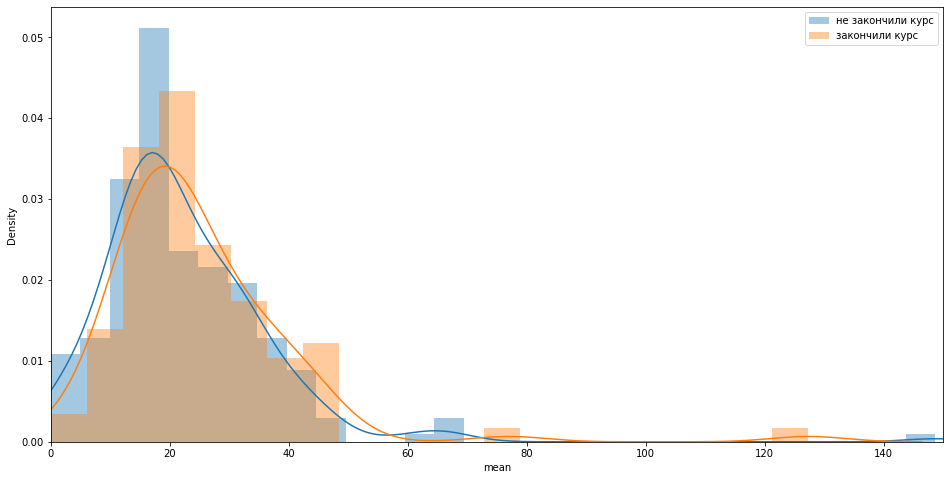

In [21]:
import seaborn as sb

df_0 = df1.loc[df1['is_achieved'] == 0]
df_1 = df1.loc[df1['is_achieved'] == 1]

plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['mean'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['mean'], label = 'закончили курс')
print('Среднее время ответа')
plt.xlim(0, 150)
plt.legend()
plt.show()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


90% квантиль


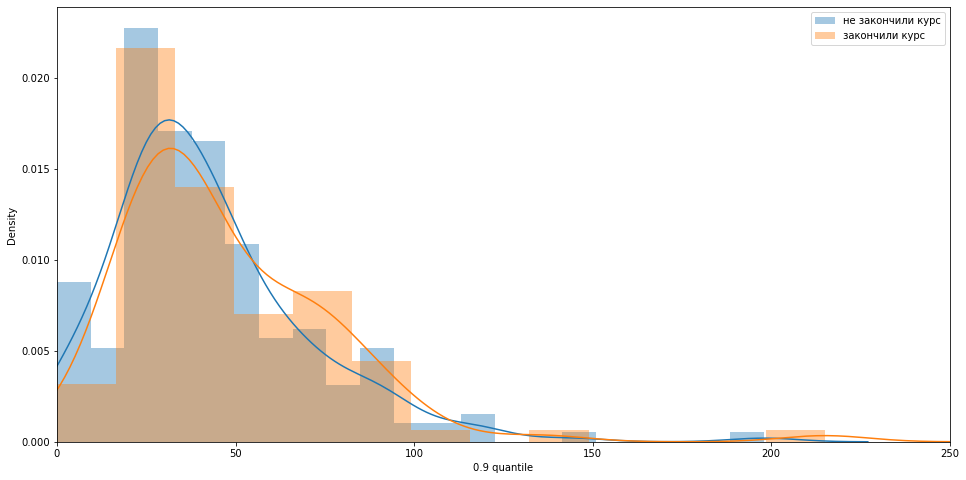

In [22]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['0.9 quantile'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['0.9 quantile'], label = 'закончили курс')
print('90% квантиль')
plt.xlim(0, 250)
plt.legend()
plt.show()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Медиана


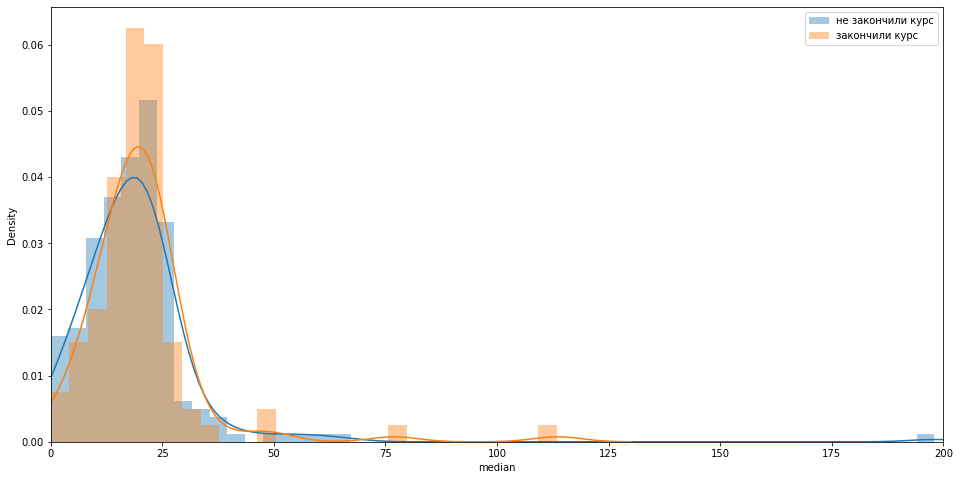

In [23]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['median'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['median'], label = 'закончили курс')
print('Медиана')
plt.xlim(0, 200)
plt.legend()
plt.show()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Максимум


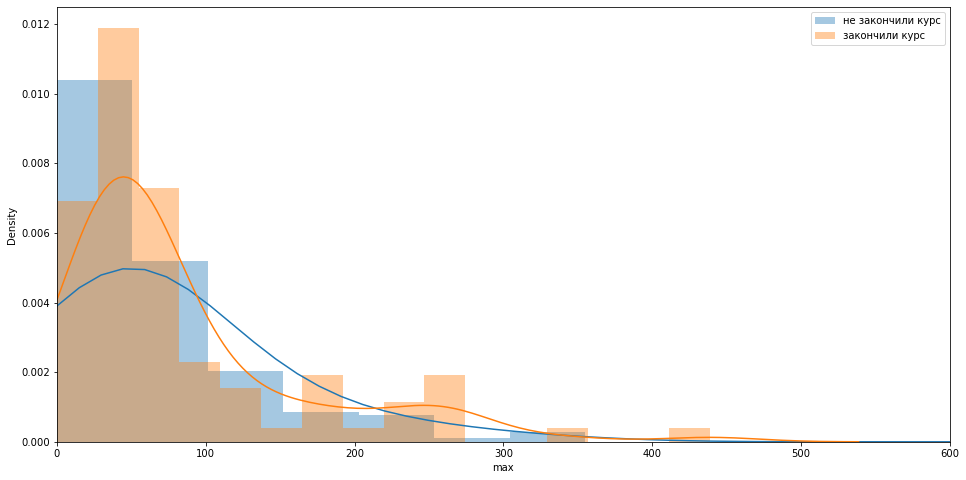

In [24]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['max'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['max'], label = 'закончили курс')
print('Максимум')
plt.legend()
plt.xlim(0, 600)
plt.show()

Средняя длина ответа ученика


/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


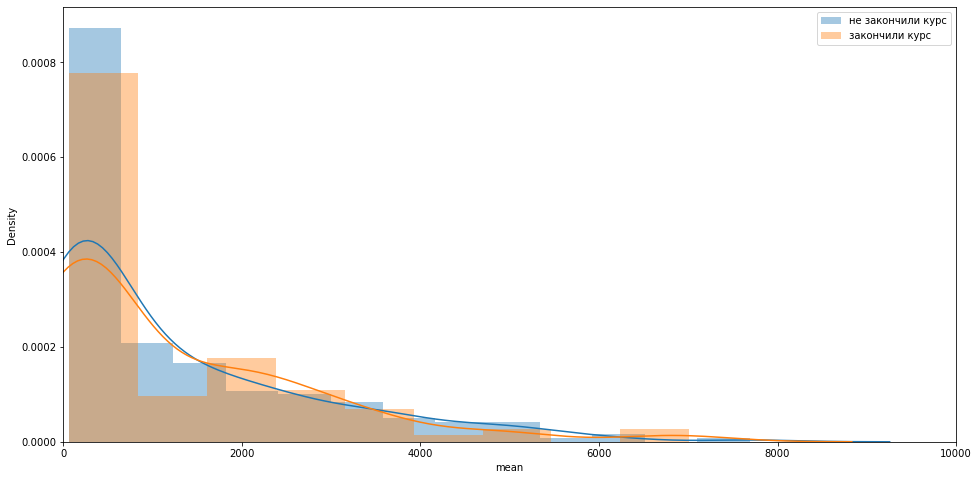

In [25]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['size_of_answer']['mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_answer']['mean'], label = 'закончили курс')
print('Средняя длина ответа ученика')
plt.xlim(0, 10000)
plt.legend()
plt.show()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Средняя длина ответа преподавателя


/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


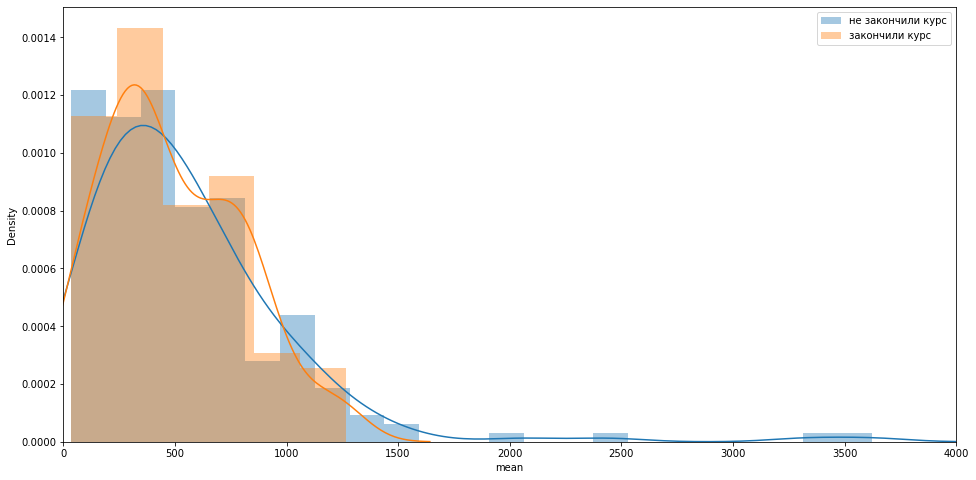

In [26]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['size_of_review']['mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_review']['mean'], label = 'закончили курс')
print('Средняя длина ответа преподавателя')
plt.xlim(0, 4000)
plt.legend()
plt.show()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Время ожидания последнего ответа от преподавателя


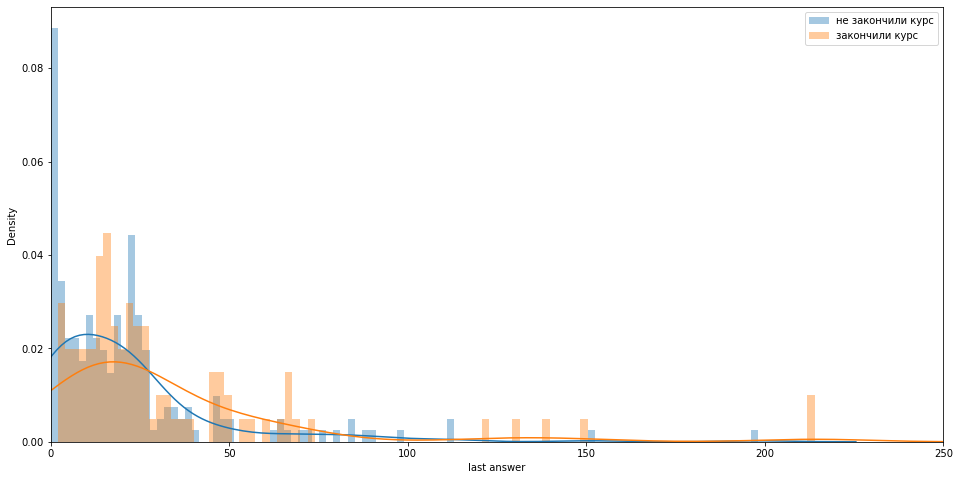

In [27]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['last answer'], bins = 100, label = 'не закончили курс')
sb.distplot(df_1['last answer'], bins = 100, label = 'закончили курс')
print('Время ожидания последнего ответа от преподавателя')
plt.xlim(0, 250)
plt.legend()
plt.show()

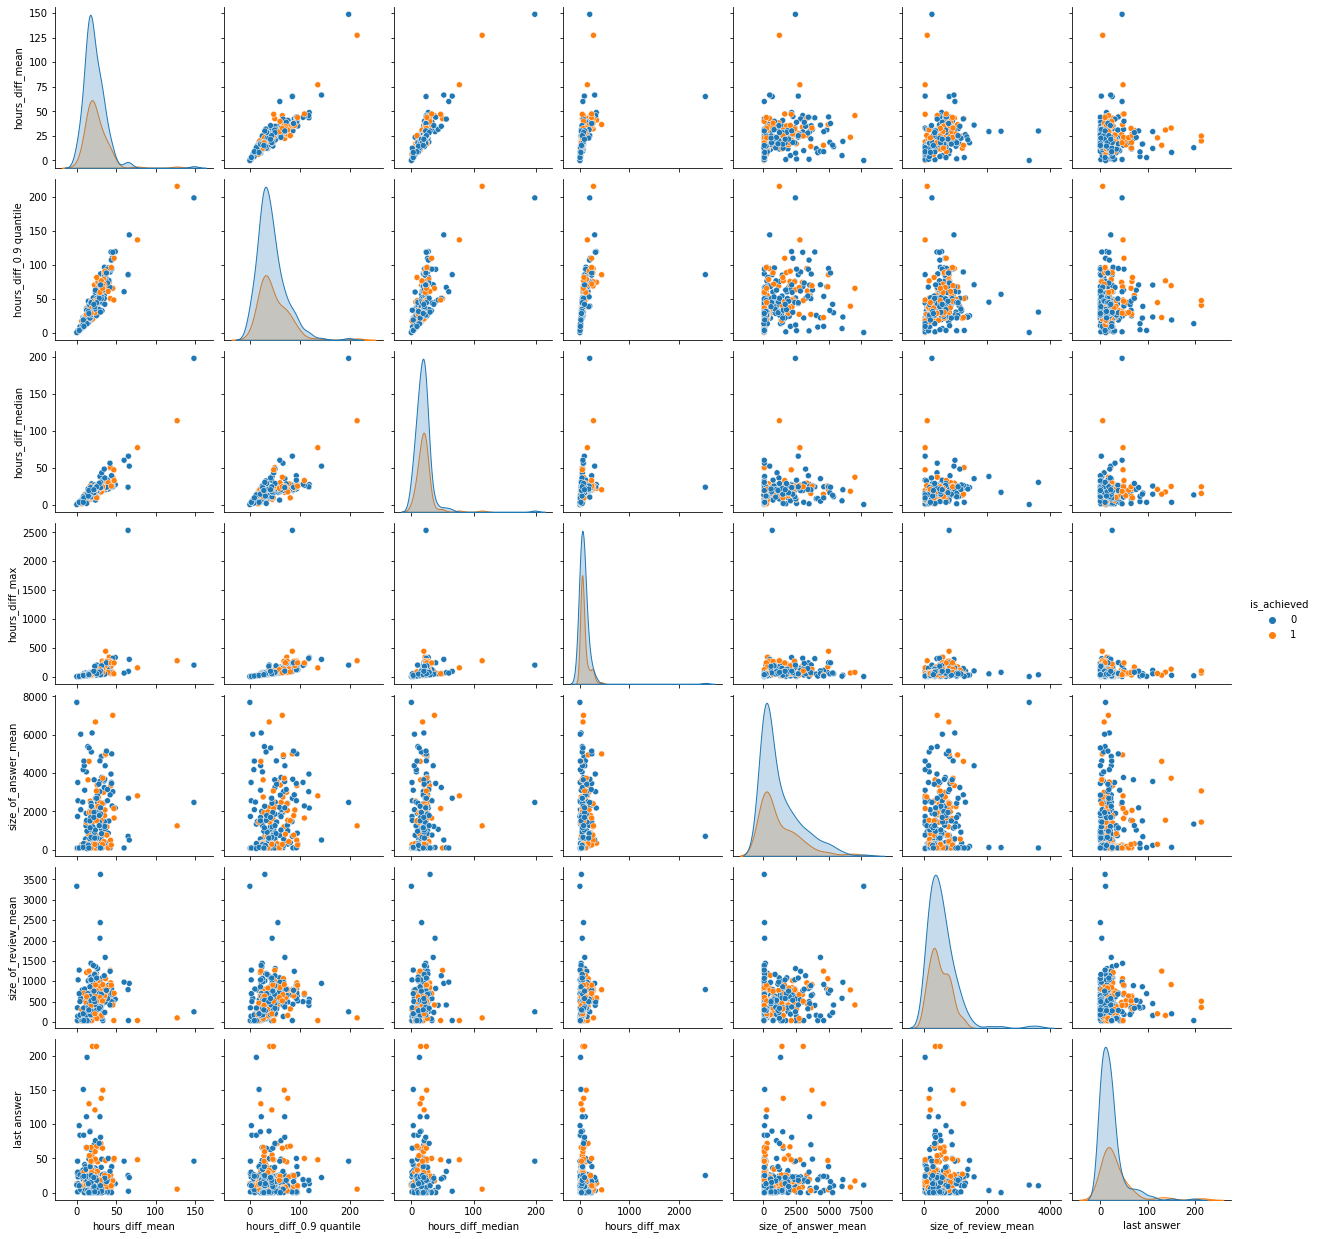

In [61]:
sb.pairplot(df1, hue = 'is_achieved')

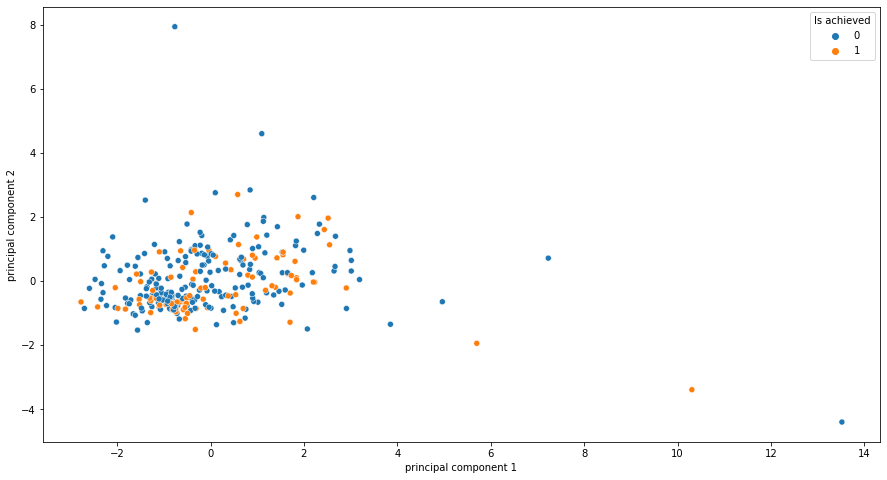

[0.42315452 0.1594127 ]


In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = sc.fit_transform(df1.drop(columns=['is_achieved']).values)
pca = PCA(n_components=2, svd_solver='auto')
coords = pca.fit_transform(X_)
finaldf = pd.DataFrame(data = coords, columns = ['principal component 1', 'principal component 2'])
finaldf['Is achieved'] = w
plt.figure(figsize=(15,8))
sb.scatterplot(data=finaldf, x="principal component 1", y="principal component 2", hue="Is achieved")
plt.show()
print(pca.explained_variance_ratio_)